# E-Commerce Course Project with ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [34]:
df = pd.read_csv('../data/ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [45]:
def get_data():
    df=pd.read_csv('../data/ecommerce_data.csv')
    data=df.as_matrix()
    
    # split each row into features and label (the last column)
    X=data[:,:-1]
    Y=data[:,-1]
    
    # normalize column n_products_viewed and visti_duration
    X[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
    X[:,2]=(X[:,2]-X[:,2].mean())/X[:,2].std()

        
    # do the one-hot-encoding on column time_of_day
    N, D = X.shape
    X2 = np.zeros((N, D + 3))
    X2[:, 0:(D-1)] = X[:, 0:(D-1)]

    
    # the time_of_day is the 5th column (0-based)
    for n in range(N):
        t = int(X[n,4])
        X2[n,t+D-1]=1
        
    return X2, Y

# def get_binary_data():
#     X, Y = get_data()
#     X2=X[Y<=1]
#     Y2=Y[Y<=1]
#     return X2, Y2

def y2indicator(Y, K):
    N = len(Y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, Y[i]] = 1
    return ind

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def classification_rate(Y, P):
    return np.mean(Y==P)

def cross_entropy(T, Y):
    return - np.mean(T * np.log(Y))

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [64]:
X, Y = get_data()
X, Y = shuffle(X, Y)

Y = Y.astype(np.int32)

M = 5
N, D = X.shape
K = len(set(Y))
print(K)

# split train data and validation data
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

# initialize weights
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)


4


In [65]:
Py, _ = forward(X, W1, b1, W2, b2)
predictions = np.argmax(Py, axis=1)

# print(predictions)
# print(Y)
classification_rate(Y, predictions)

0.378

0 0.33617216418 0.349594995206
1000 0.0331443504606 0.0349970576966
2000 0.0295770322974 0.0315654528007
3000 0.0253161415216 0.0327335392048
4000 0.0235922743941 0.0325182736332
5000 0.022538399818 0.0311731085536
6000 0.0215874915357 0.0297576422954
7000 0.0210036438008 0.02916391096
8000 0.020824378771 0.0290482549168
9000 0.0207736339027 0.0290280210963
final train classification_rate: 0.985
final test classification_rate: 0.96


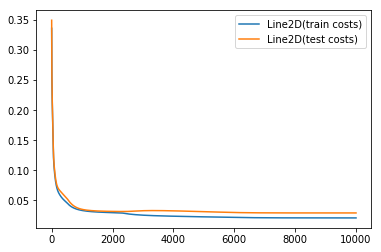

In [66]:


epochs = 10000;
learning_rate = 0.001
reg = 0.5

train_costs = []
test_costs = []

for ep in range(epochs):
    
    Pytrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    Pytest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    cTrain = cross_entropy(Ytrain_ind, Pytrain)
    cTest = cross_entropy(Ytest_ind, Pytest)
    train_costs.append(cTrain)
    test_costs.append(cTest)
    
    Pytrain_Y = Pytrain - Ytrain_ind
    W2 -= learning_rate * (Ztrain.T.dot(Pytrain_Y) + reg * W2)
    b2 -= learning_rate * ((Pytrain_Y).sum() + reg * b2)
    
    dZ = (Pytrain_Y).dot(W2.T) * (1 - Ztrain * Ztrain)
    W1 -= learning_rate * (Xtrain.T.dot(dZ) + reg * W1)
    b1 -= learning_rate * (dZ.sum(axis=0) + reg * b1)
    
    if ep % 1000 == 0:
        print(ep, cTrain, cTest)
    
print("final train classification_rate:", classification_rate(Ytrain, predict(Pytrain)))
print("final test classification_rate:", classification_rate(Ytest, predict(Pytest)))

legend1, = plt.plot(train_costs, label='train costs')
legend2, = plt.plot(test_costs, label='test costs')
plt.legend([legend1, legend2])
plt.show()